In [1]:
# Importation des modules
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import mplfinance as mpf

In [2]:
# Définition de la liste d'action
d_tickers = {  # Dictionnaire pour les valeurs
    "AI.PA": {"nom": "Air liquide", "label": "Close"},
    "AIR.PA": {"nom": "Airbus", "label": "Close"},
    "ALO.PA": {"nom": "Alstom", "label": "Close"},
    "MT.AS": {"nom": "ArcelorMittal", "label": "Close"},
    "CS.PA": {"nom": "Axa", "label": "Close"},
    "BNP.PA": {"nom": "BNP Paribas", "label": "Close"},
    "EN.PA": {"nom": "Bouygues", "label": "Close"},
    "CAP.PA": {"nom": "Capgemini", "label": "Close"},
    "CA.PA": {"nom": "Carrefour", "label": "Close"},
    "ACA.PA": {"nom": "Credit agricole", "label": "Close"},
    "BN.PA": {"nom": "Danone", "label": "Close"},
    "DSY.PA": {"nom": "Dassault Systemes", "label": "Close"},
    "ENGI.PA": {"nom": "Engie", "label": "Close"},
    "EL.PA": {"nom": "EssilorLuxottica", "label": "Close"},
    "ERF.PA": {"nom": "EUROFINS SCIENTIFIC", "label": "Close"},
    "RMS.PA": {"nom": "Hermes International", "label": "Close"},
    "KER.PA": {"nom": "Kering", "label": "Close"},
    "OR.PA": {"nom": "L-Oreal", "label": "Close"},
    "LR.PA": {"nom": "Legrand", "label": "Close"},
    "MC.PA": {"nom": "LVMH", "label": "Close"},
    "ML.PA": {"nom": "Michelin", "label": "Close"},
    "ORA.PA": {"nom": "Orange", "label": "Close"},
    "RI.PA": {"nom": "Pernod Ricard", "label": "Close"},
    "PUB.PA": {"nom": "Publicis Groupe", "label": "Close"},
    "RNO.PA": {"nom": "Renault", "label": "Close"},
    "SAF.PA": {"nom": "Safran", "label": "Close"},
    "SGO.PA": {"nom": "Saint-Gobain", "label": "Close"},
    "SAN.PA": {"nom": "Sanofi", "label": "Close"},
    "SU.PA": {"nom": "Schneider Electric", "label": "Close"},
    "GLE.PA": {"nom": "Societe generale", "label": "Close"},
    #"STLA.PA": {"nom": "Stellantis", "label": "Close"},
    "STM.PA": {"nom": "STMicroelectronics", "label": "Close"},
    "TEP.PA": {"nom": "Teleperformance", "label": "Close"},
    "HO.PA": {"nom": "Thales", "label": "Close"},
    "TTE.PA": {"nom": "TotalEnergies", "label": "Close"},
    "URW.AS": {"nom": "Unibail-Rodamco-Westfield", "label": "Close"},
    "VIE.PA": {"nom": "Veolia", "label": "Close"},
    "DG.PA": {"nom": "Vinci", "label": "Close"},
    "VIV.PA": {"nom": "Vivendi", "label": "Close"},
    "WLN.PA": {"nom": "Worldline", "label": "Close"}
}

# Définition de la date de début et de fin
debut = dt.datetime(2020, 1, 2)  # Date de debut recup donnees
fin = dt.datetime(2021, 12, 31)  # Date de fin recup donnees

# Récupération des valeurs de l'action
tickers = [i for i in d_tickers.keys()]
df = web.DataReader(tickers, 'yahoo', debut, fin)

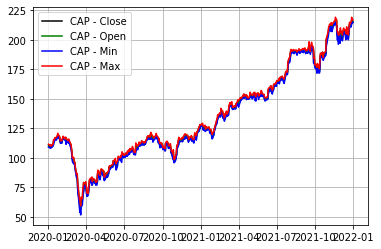

In [3]:
# Affichage des courbes des actions et chandelier pour CAP
# The syntax to plot a line chart
plt.plot(df['Close']["CAP.PA"], color = 'black', label = 'CAP - Close')
plt.plot(df['Open']["CAP.PA"], color = 'green', label = 'CAP - Open')
plt.plot(df['Low']["CAP.PA"], color = 'blue', label = 'CAP - Min')
plt.plot(df['High']["CAP.PA"], color = 'red', label = 'CAP - Max')

# The syntax to add the label created above
plt.legend()
# The syntax to add a grid
plt.grid()

In [4]:
# Fonction création et plot chandelier
def chandelier_plot(Data, window, name, moy20=True, moy50=True):
    Chosen = Data.iloc[-window:, :]
    #print(Chosen)
    if moy20:
        df_moy20 = moyenne_mobile(Data.iloc[-window-20:, :], window, 20)
        Chosen = pd.concat([Chosen, df_moy20], axis=1)
    if moy50:
        df_moy50 = moyenne_mobile(Data.iloc[-window-50:, :], window, 50)
        Chosen = pd.concat([Chosen, df_moy50], axis=1)
    
    fig, ax = plt.subplots(figsize=(16, 7.5))
    for i in range(len(Chosen)):
        plt.vlines(x = Chosen.index[i], ymin = Chosen.iloc[i, 2], ymax = Chosen.iloc[i, 1],
                   color = 'black', linewidth = 1)
        
        if Chosen.iloc[i, 3] > Chosen.iloc[i, 0]:
            color_chosen = 'green'
            plt.vlines(x = Chosen.index[i], ymin = Chosen.iloc[i, 0], ymax = Chosen.iloc[i, 3],
                       color = color_chosen, linewidth = 5)
        if Chosen.iloc[i, 3] < Chosen.iloc[i, 0]:
            color_chosen = 'red'
            plt.vlines(x = Chosen.index[i], ymin = Chosen.iloc[i, 3], ymax = Chosen.iloc[i, 0],
                       color = color_chosen, linewidth = 5)  
        if Chosen.iloc[i, 3] == Chosen.iloc[i, 0]:
            color_chosen = 'black'
            plt.vlines(x = Chosen.index[i], ymin = Chosen.iloc[i, 3] - 0.01, ymax = Chosen.iloc[i, 0] + 0.01,
                       color = color_chosen, linewidth = 5)  
          
    plt.grid()
    plt.title(name)
    
    if moy20:
        plt.plot(Chosen['Moy20'], label = '20-period Moving Average')
    if moy50:
        plt.plot(Chosen['Moy50'], label = '50-period Moving Average')    
    # Add the label of the Moving Average
    plt.legend()

# Fonction création moyenne glissante
def moyenne_mobile(Data, window, valeur):
    df_moy = pd.concat([Data, Data['Close'].rolling(window=valeur).mean()], axis=1)
    df_moy.columns = ['Open', 'High', 'Low', 'Close', 'Moy' + str(valeur)]
    return df_moy.iloc[-window:, -1]


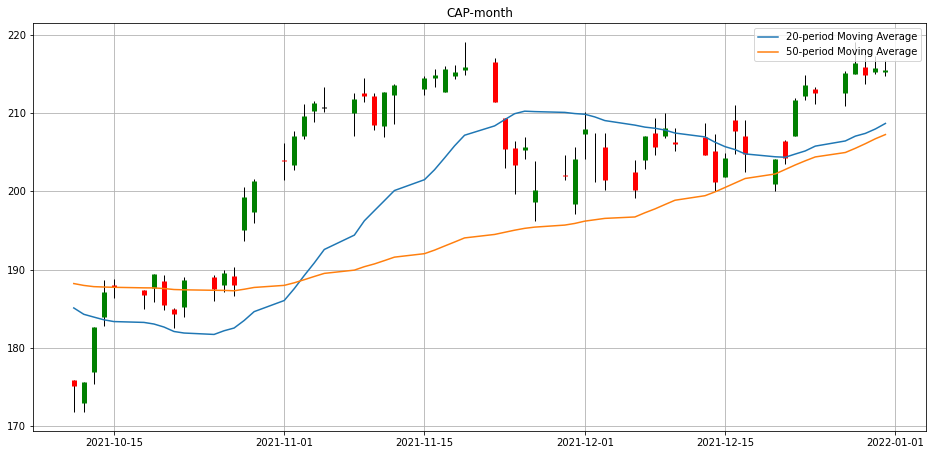

In [5]:
# Creation data for CAP
df_CAP = pd.concat([df['Open']["CAP.PA"], df['High']["CAP.PA"], df['Low']["CAP.PA"], df['Close']["CAP.PA"]], axis = 1)
df_CAP.columns = ['Open', 'High', 'Low', 'Close']

# Using the function
chandelier_plot(df_CAP, 60, 'CAP-month')

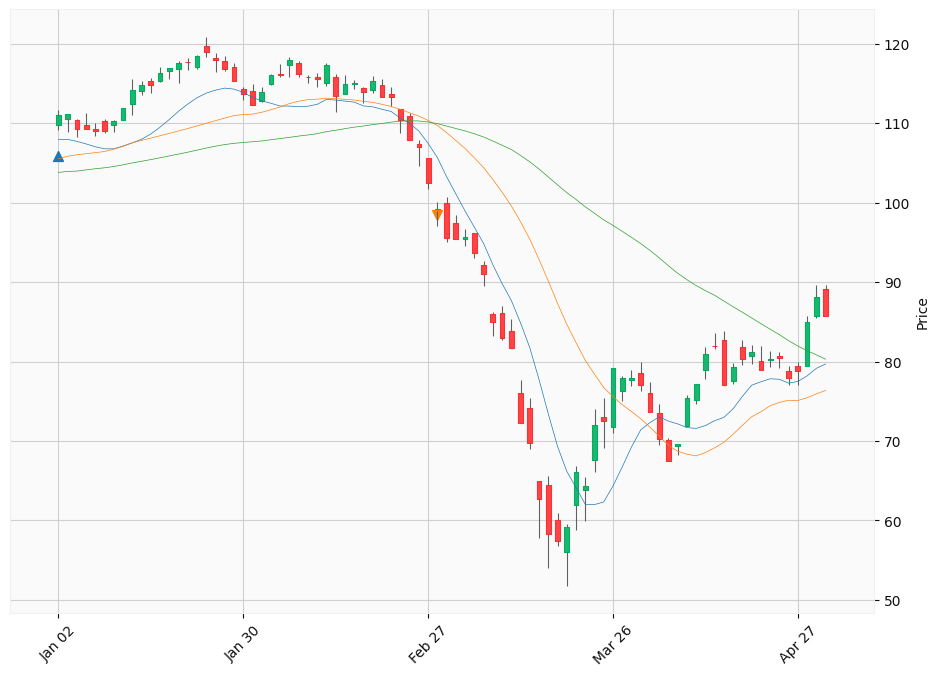

In [6]:
# Définition de la liste d'action
d_tickers = {  # Dictionnaire pour les valeurs
    "CAP.PA": {"nom": "Capgemini", "label": "Close"}
}

# Définition de la date de début et de fin
debut = dt.datetime(2018, 1, 2)  # Date de debut recup donnees
fin = dt.datetime(2021, 12, 31)  # Date de fin recup donnees

# Récupération des valeurs de l'action
tickers = [i for i in d_tickers.keys()]
df1 = web.DataReader(tickers, 'yahoo', debut, fin)

#print(df1)

data = pd.concat([df1['Open'], df1['High'], df1['Low'], df1['Close'], df1['Adj Close'], df1['Volume']], axis=1)
data.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

#print(data)

data['MA8'] = data['Adj Close'].rolling(8).mean()
data['MA20'] = data['Adj Close'].rolling(20).mean()
data['MA50'] = data['Adj Close'].rolling(50).mean()
data = data.dropna()
data = data['2020-1-2':'2020-04-30']

buy_signals = []
sell_signals = []

for i in range(len(data)):
    if (data['MA20'].iloc[i] > data['MA50'].iloc[i]) and (data['MA20'].iloc[i-1] < data['MA50'].iloc[i-1]):
        buy_signals.append(data.iloc[i]['Adj Close'] * 0.98)
    else:
        buy_signals.append(np.nan)
    
    if (data['MA20'].iloc[i] < data['MA50'].iloc[i]) and (data['MA20'].iloc[i-1] > data['MA50'].iloc[i-1]):
        sell_signals.append(data.iloc[i]['Adj Close'] * 1.02)
    else:
        sell_signals.append(np.nan)

buy_markers = mpf.make_addplot(buy_signals, type='scatter', markersize=50, marker='^')
sell_markers = mpf.make_addplot(sell_signals, type='scatter', markersize=50, marker='v')
moy8 = mpf.make_addplot(data['MA8'], width=0.5)
moy20 = mpf.make_addplot(data['MA20'], width=0.5)
moy50 = mpf.make_addplot(data['MA50'], width=0.5)
apds = [buy_markers, sell_markers, moy8, moy20, moy50]
mpf.plot(data, type="candle", style='yahoo', addplot=apds, figscale=1.5)

In [51]:
# Figure chandelier
# Le pendu
""" Figure haussière qui désigne une probabilité de retournement
- Puissance déterminée par la taille de l'ombre (plus grand est l'ombre plus le retournement sera puissant)
- Valable quelque soit la couleur
"""
# Le marteau
""" Figure baissière qui désigne une probabilité de retournement
- Puissance déterminée par la taille de l'ombre (plus grand est l'ombre plus le retournement sera puissant)
- Valable quelque soit la couleur
"""
def show_pendu_marteau(Data, tolerance):
    # Création colonne 'Pendu' avec que des '0' à l'initialisation
    df_pendu = Data['Close'] * 0
    # Bougie verte
    df_pendu[(Data['Close'] >= Data['High'] * (1 - tolerance)) &
             (Data['Close'] - Data['Open'] <= (Data['Open'] - Data['Low']) / 1.5)] = Data['Low'][(Data['Close'] >= Data['High'] * (1 - tolerance)) &
             (Data['Close'] - Data['Open'] <= (Data['Open'] - Data['Low']) / 1.5)] - 10
    # Bougie rouge
    df_pendu[(Data['Open'] >= Data['High'] * (1 - tolerance)) &
             (Data['Open'] - Data['Close'] <= (Data['Close'] - Data['Low']) / 1.5)] = Data['Low'][(Data['Open'] >= Data['High'] * (1 - tolerance)) &
             (Data['Open'] - Data['Close'] <= (Data['Close'] - Data['Low']) / 1.5)] - 10
    Data['pendu-marteau'] = df_pendu

    
# L'étoile filante
""" Figure haussière qui désigne une probabilité de retournement
- Puissance déterminée par la taille de l'ombre (plus grand est l'ombre plus le retournement sera puissant)
- Valable quelque soit la couleur
"""
# Le marteau inversé
""" Figure baissière qui désigne une probabilité de retournement
- Puissance déterminée par la taille de l'ombre (plus grand est l'ombre plus le retournement sera puissant)
- Valable quelque soit la couleur
"""
def show_etoileFilante_marteauInverse(Data, tolerance):
    # Création colonne 'etoile-marteauInv' avec que des '0' à l'initialisation
    df_etoile = Data['Close'] * 0
    # Bougie verte
    df_etoile[(Data['Open'] <= Data['Low'] * (1 + tolerance)) & 
              (Data['Close'] - Data['Open'] <= (Data['High'] - Data['Close']) / 1.5)] = Data['Low'][(Data['Open'] <= Data['Low'] * (1 + tolerance)) & 
              (Data['Close'] - Data['Open'] <= (Data['High'] - Data['Close']) / 1.5)] - 10
    # Bougie rouge
    df_etoile[(Data['Close'] <= Data['Low'] * (1 + tolerance)) & 
              (Data['Open'] - Data['Close'] <= (Data['High'] - Data['Open']) / 1.5)] = Data['Low'][(Data['Close'] <= Data['Low'] * (1 + tolerance)) & 
              (Data['Open'] - Data['Close'] <= (Data['High'] - Data['Open']) / 1.5)] - 10
    Data['etoile-marteauInv'] = df_etoile

    
# La ligne perçante
""" Figure qui désigne une probabilité de tendance haussière
- Bougie rouge suivie d'une bougie verte
- Valable peu importe la tendance actuelle
"""
def show_ligne_percante(Data, tolerance):
    # Création colonne 'ciel_percante' avec que des '0' à l'initialisation
    df_percante = Data['Close'] * 0
    # Bougie rouge suivie bougie verte avec ouverture(v) inf fermeture(r) et fermeture(v) sup milieu corps(r)
    df_percante[(Data['Close'].shift(1) < Data['Open'].shift(1)) & (Data['Open'] < Data['Close']) & 
                (Data['Open'] < Data['Close'].shift(1)) & (Data['Close'] > (Data['Open'].shift(1) + Data['Close'].shift(1)) / 2) &
                (Data['Close'] < Data['Open'].shift(1))] = Data['Low'][(Data['Close'].shift(1) < Data['Open'].shift(1)) & (Data['Open'] < Data['Close']) & 
                (Data['Open'] < Data['Close'].shift(1)) & (Data['Close'] > (Data['Open'].shift(1) + Data['Close'].shift(1)) / 2) &
                (Data['Close'] < Data['Open'].shift(1))] - 10
    Data['ligne_percante'] = df_percante    
                                  
# Le ciel couvert
""" Figure qui désigne une probabilité de tendance baissière
- Bougie verte suivie d'une bougie rouge
- Valable peu importe la tendance actuelle
"""
def show_ciel_couvert(Data, tolerance):
    # Création colonne 'ciel_percante' avec que des '0' à l'initialisation
    df_couvert = Data['Close'] * 0
    # Bougie verte suivie bougie rouge avec ouverture(r) sup fermeture(v) et fermeture(r) inf milieu corps(v)
    df_couvert[(Data['Open'].shift(1) < Data['Close'].shift(1)) & (Data['Close'] < Data['Open']) & 
                (Data['Open'] > Data['Close'].shift(1)) & (Data['Close'] < (Data['Open'].shift(1) + Data['Close'].shift(1)) / 2) &
                (Data['Close'] > Data['Open'].shift(1))] = Data['Low'][(Data['Open'].shift(1) < Data['Close'].shift(1)) & (Data['Close'] < Data['Open']) & 
                (Data['Open'] > Data['Close'].shift(1)) & (Data['Close'] < (Data['Open'].shift(1) + Data['Close'].shift(1)) / 2) &
                (Data['Close'] > Data['Open'].shift(1))] - 10
    Data['ciel_couvert'] = df_couvert    
    
    
 # Avalement haussier
""" Figure qui désigne une probabilité de tendance haussière
- Bougie rouge suivie d'une bougie verte
- Valable peu importe la tendance actuelle
- Puissance déterminée par l'importance de l'avalement
"""
def show_avalement_haussier(Data, tolerance):
    # Création colonne 'aval_haussier' avec que des '0' à l'initialisation
    df_haussier = Data['Close'] * 0
    # Bougie rouge suivie bougie verte avec ouverture(v) inf fermeture(r) et fermeture(v) sup ouverture(r)
    df_haussier[(Data['Close'].shift(1) < Data['Open'].shift(1)) & (Data['Open'] < Data['Close']) & 
                (Data['Open'] < Data['Close'].shift(1)) & (Data['Close'] > Data['Open'].shift(1))] = Data['Low'][(Data['Close'].shift(1) < Data['Open'].shift(1)) & (Data['Open'] < Data['Close']) & 
                (Data['Open'] < Data['Close'].shift(1)) & (Data['Close'] > Data['Open'].shift(1))] - 10
    Data['aval_haussier'] = df_haussier    
                                  
# Avalement baissier
""" Figure qui désigne une probabilité de tendance baissière
- Bougie verte suivie d'une bougie rouge
- Valable peu importe la tendance actuelle
- Puissance déterminée par l'importance de l'avalement
"""
def show_avalement_baissier(Data, tolerance):
    # Création colonne 'aval_baissier' avec que des '0' à l'initialisation
    df_baissier = Data['Close'] * 0
    # Bougie verte suivie bougie rouge avec ouverture(r) sup fermeture(v) et fermeture(r) inf ouverture (v)
    df_baissier[(Data['Open'].shift(1) < Data['Close'].shift(1)) & (Data['Close'] < Data['Open']) & 
                (Data['Open'] > Data['Close'].shift(1)) & (Data['Close'] < Data['Open'].shift(1))] = Data['Low'][(Data['Open'].shift(1) < Data['Close'].shift(1)) & (Data['Close'] < Data['Open']) & 
                (Data['Open'] > Data['Close'].shift(1)) & (Data['Close'] < Data['Open'].shift(1))] - 10
    Data['aval_baissier'] = df_baissier    


In [52]:
# Complément étude figure chandelier avec RSI pour prise de décision
import pandas_ta as ta

# Reprise des données initiale pour nouvelle étude
data = pd.concat([df1['Open'], df1['High'], df1['Low'], df1['Close'], df1['Adj Close'], df1['Volume']], axis=1)
data.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

df_rsi = data.ta.rsi(talib=False)

# Reduction sur une periode spécifique
data = data['2020-1-2':'2020-04-30']
df_rsi = df_rsi['2020-1-2':'2020-04-30']

/var/folders/nt/cmtq2_x168bcy7yfttbybmfc0000gn/T/ipykernel_3229/4134878870.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['pendu-marteau'] = df_pendu


Date
2020-01-02          NaN
2020-01-03    98.949997
2020-01-06          NaN
2020-01-07    99.349998
2020-01-08          NaN
                ...    
2020-04-24          NaN
2020-04-27          NaN
2020-04-28          NaN
2020-04-29          NaN
2020-04-30    75.720001
Length: 84, dtype: float64


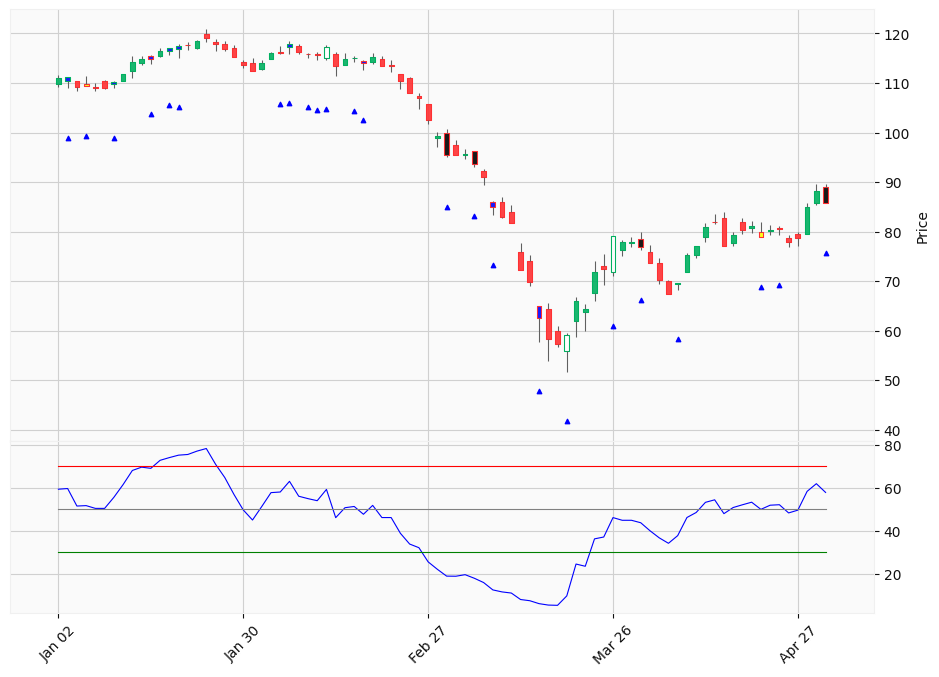

In [53]:
show_pendu_marteau(data, 0.005)
show_etoileFilante_marteauInverse(data, 0.005)
show_ligne_percante(data, 0.005)
show_ciel_couvert(data, 0.005)
show_avalement_haussier(data, 0.005)
show_avalement_baissier(data, 0.005)

# Affichage avec couleur Pendu-Marteau et étoile-marteauInv
mco = pd.Series(data['pendu-marteau'].values, index=data.index)
mco[data['pendu-marteau'] >= 1.0] = 'blue'
mco[data['pendu-marteau'] == 0.0] = None
mco[data['etoile-marteauInv'] >= 1.0] = 'yellow'
mco[data['ligne_percante'] >= 1.0] = 'white'
mco[data['ciel_couvert'] >= 1.0] = 'black'
mco[data['aval_haussier'] >= 1.0] = 'white'
mco[data['aval_baissier'] >= 1.0] = 'black'

# Complément avec marqueur bleu
mco_markers = data['pendu-marteau'] + data['etoile-marteauInv'] + data['ligne_percante'] + data['ciel_couvert'] + \
              data['aval_haussier'] + data['aval_baissier']
mco_markers[mco_markers == 0] = np.nan
print(mco_markers)
figure_markers = mpf.make_addplot(mco_markers, type='scatter', markersize=10, marker='^', color='b')
# RSI complément
rsi = mpf.make_addplot(df_rsi, panel=1, type='line', color='b', width=0.8)
rsi30 = mpf.make_addplot(df_rsi * 0 + 30, panel=1, type='line', color='g', width=0.8)
rsi50 = mpf.make_addplot(df_rsi * 0 + 50, panel=1, type='line', color='grey', width=0.8)
rsi70 = mpf.make_addplot(df_rsi * 0 + 70, panel=1, type='line', color='r', width=0.8)
apds = [figure_markers, rsi, rsi30, rsi50, rsi70]
mpf.plot(data, type="candle", style='yahoo', figscale=1.5, marketcolor_overrides=mco.values, mco_faceonly=True,
         addplot=apds)
